In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('SR_Results.csv')
df.head()

,File Name,No Cols,No Rows,No IMFs,Best RMSE,Best SSIM,Best PSNR,Best RMSE - Value,Best SSIM - Value,Best PSNR - Value,HHT RMSE,HHT SSIM,HHT PSNR,xRows,xCols
0,00904.jpg,520,390,7,Bilinear,Bilinear,Bilinear,0.149247,0.791410,22.229484,0.159702,0.754614,21.641394,2.450293,13.174735
1,00905.jpg,640,480,4,Gaussian,Bilinear,Gaussian,0.195692,0.449860,18.814752,0.209374,0.411570,18.227744,19.935878,2.072553
2,00906.jpg,500,375,3,Gaussian,Bilinear,Gaussian,0.380443,0.481529,16.638643,0.426236,0.397601,15.651433,17.174523,12.019129
3,00907.jpg,480,360,5,Bilinear,Bilinear,Bilinear,0.175702,0.751171,21.158302,0.183109,0.685496,20.799664,5.490906,3.264597
4,00908.jpg,640,480,6,Bilinear,Bilinear,Bilinear,0.151554,0.677021,21.432636,0.164457,0.611657,20.722948,4.252711,13.762421


## RMSE Distribution:

<AxesSubplot:xlabel='HHT RMSE'>

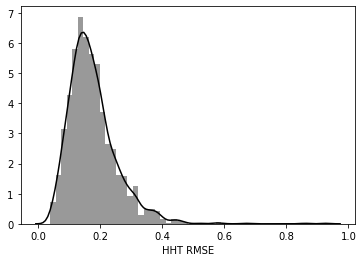

In [2]:
sns.distplot(df['HHT RMSE'], color='black')

## PSNR Distribution:

<AxesSubplot:xlabel='HHT PSNR'>

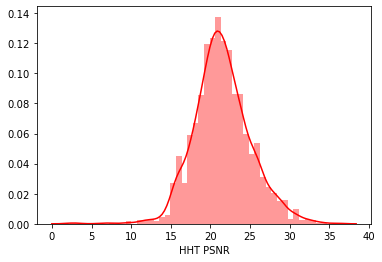

In [3]:
sns.distplot(df['HHT PSNR'], color='r')

## SSIM Distribution:

<AxesSubplot:xlabel='HHT SSIM'>

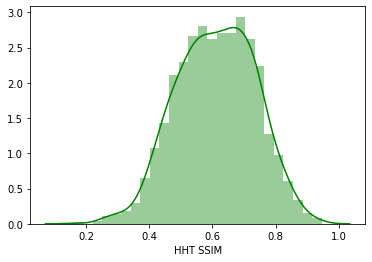

In [4]:
sns.distplot(df['HHT SSIM'], color='g')

## xRows X xCols X RMSE/SSIM/PSNR:
Resize parameters affect on error metrics:

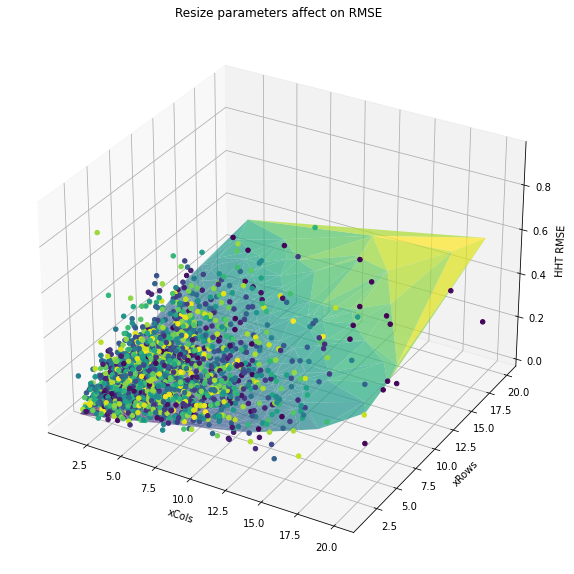

In [76]:
fig = plt.figure(figsize=(10, 10))
x = df['xCols']
y = df['xRows']
z = df['HHT RMSE']
data = np.array([x.to_numpy(), y.to_numpy()]).T
reg_plane = np.linalg.solve(np.dot(data.T, data), np.dot(data.T, z))
reg_plane = np.dot(data, reg_plane)
c = np.arange(len(x))
ax = fig.add_subplot(111, projection='3d')
ax.set_ylabel('xRows')
ax.set_xlabel('xCols')
ax.set_title('Resize parameters affect on RMSE')
ax.set_zlabel('HHT RMSE')
ax.scatter(x, y, z, cmap='viridis',c=c,alpha = 1)
ax.plot_trisurf(x.to_numpy(), y.to_numpy(), reg_plane,alpha=0.7, cmap='viridis')

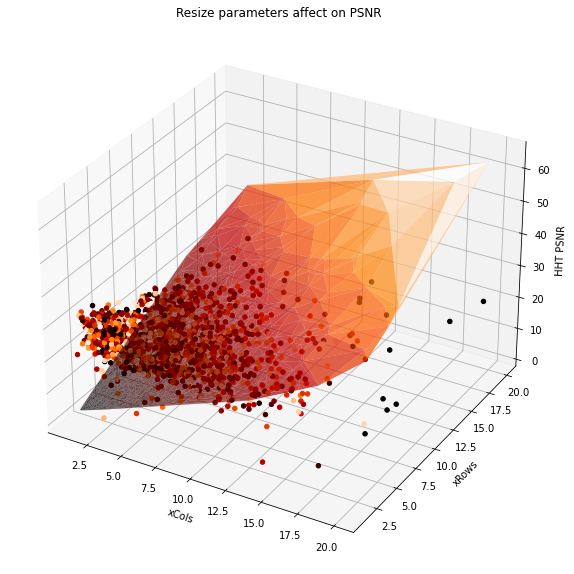

In [74]:
fig = plt.figure(figsize=(10, 10))
x = df['xCols']
y = df['xRows']
z = df['HHT PSNR']
data = np.array([x.to_numpy(), y.to_numpy()]).T
reg_plane = np.linalg.solve(np.dot(data.T, data), np.dot(data.T, z))
reg_plane = np.dot(data, reg_plane)
c = np.arange(len(x))
ax = fig.add_subplot(111, projection='3d')
ax.set_ylabel('xRows')
ax.set_xlabel('xCols')
ax.set_title('Resize parameters affect on PSNR')
ax.set_zlabel('HHT PSNR')
ax.scatter(x, y, z, cmap='gist_heat',c=c,alpha = 1)
ax.plot_trisurf(x.to_numpy(), y.to_numpy(), reg_plane,alpha=0.7, cmap='gist_heat')

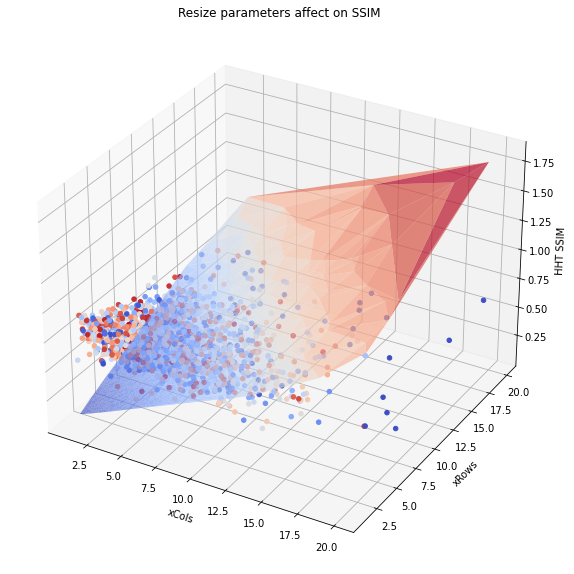

In [75]:
fig = plt.figure(figsize=(10, 10))
x = df['xCols']
y = df['xRows']
z = df['HHT SSIM']
data = np.array([x.to_numpy(), y.to_numpy()]).T
reg_plane = np.linalg.solve(np.dot(data.T, data), np.dot(data.T, z))
reg_plane = np.dot(data, reg_plane)
c = np.arange(len(x))
ax = fig.add_subplot(111, projection='3d')
ax.set_ylabel('xRows')
ax.set_xlabel('xCols')
ax.set_title('Resize parameters affect on SSIM')
ax.set_zlabel('HHT SSIM')
ax.scatter(x, y, z, cmap='coolwarm',c=c,alpha = 1)
ax.plot_trisurf(x.to_numpy(), y.to_numpy(), reg_plane,alpha=0.7, cmap='coolwarm')

## How far are our algorithm's results from the best results?

<AxesSubplot:>

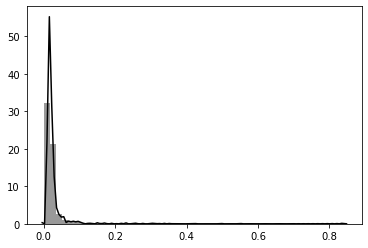

In [77]:
## RMSE Distance
sns.distplot(-df['Best RMSE - Value'] + df['HHT RMSE'], color='black')

<AxesSubplot:>

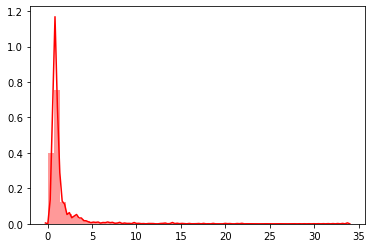

In [33]:
## PSNR Distance
sns.distplot(df['Best PSNR - Value'] - df['HHT PSNR'], color='r')


<AxesSubplot:>

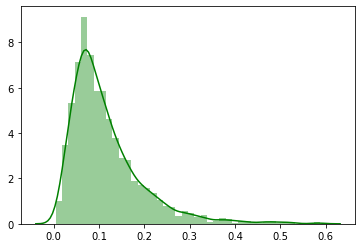

In [34]:
## SSIM Distance
sns.distplot(df['Best SSIM - Value']-df['HHT SSIM'], color='g')